In [1]:
import os, sys
import warnings

main_path = os.getcwd()

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Data manipulation
import numpy as np
import pandas as pd
#import datetime
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import jarque_bera
from scipy.stats import t
from arch import arch_model
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# Plotting
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

# Statistical manipulation
from scipy.stats import norm

# Tabulate data
from tabulate import tabulate

#df_vda = pd.read_csv(os.path.join(main_path, r'Bases\\VDA\\OFER_VDA_20180731.csv'))

In [3]:
df_cpa = pd.DataFrame()
period = [(7,11),(7,13),(7,20),(7,25),(7,31), (7, 6), (7, 13), 
          (8,22),(8,28),(8,10),(8,14),(8,16),(8,21),(8,31),(8,7), 
          (9,6),(9,21),(9,5), (9,11),(9,14),(9,24),(9,27),
          (10,26),(10,22),(10,5),(10,16),(10,29),(10,30),(10,8)
          #(11,22),(11,14),(11,16)
         ]
for per in period:
    mth, day = per
    load_path = "Bases\\CPA\\OFER_CPA_2018{}{}.txt".format(str(mth).zfill(2), str(day).zfill(2))
    os.path.join(main_path, load_path)
    print(load_path)
    df_temp = pd.read_csv(load_path)
    df_cpa = pd.concat([df_cpa, df_temp])

C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180711.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180713.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180720.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180725.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180731.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180706.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180713.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180822.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180828.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180810.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180814.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180816.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180821.txt
C:\Users\vipac\Desktop\ITAU\ValueAtRisk\Bases\CPA\OFER_CPA_20180

In [4]:
SUZB3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='SUZB3                                             ']
SUZB3 = SUZB3.sort_values(by=['Hora_Prioridade'])

MGLU3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='MGLU3                                             ']
MGLU3 = MGLU3.sort_values(by=['Hora_Prioridade'])

FIBR3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='FIBR3                                             ']
FIBR3 = FIBR3.sort_values(by=['Hora_Prioridade'])

BTOW3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='BTOW3                                             ']
BTOW3 = BTOW3.sort_values(by=['Hora_Prioridade'])

VALE3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='VALE3                                             ']
VALE3 = VALE3.sort_values(by=['Hora_Prioridade'])

BRKM5 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='BRKM5                                             ']
BRKM5 = BRKM5.sort_values(by=['Hora_Prioridade'])

EMBR3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='EMBR3                                             ']
EMBR3 = EMBR3.sort_values(by=['Hora_Prioridade'])

PETR4 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='PETR4                                             ']
PETR4 = PETR4.sort_values(by=['Hora_Prioridade'])

CPFE3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='CPFE3                                             ']
CPFE3 = CPFE3.sort_values(by=['Hora_Prioridade'])

KLBN4 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='KLBN4                                             ']
KLBN4 = KLBN4.sort_values(by=['Hora_Prioridade'])

BRFS3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='BRFS3                                             ']
BRFS3 = BRFS3.sort_values(by=['Hora_Prioridade'])

KROT3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='KROT3                                             ']
KROT3 = KROT3.sort_values(by=['Hora_Prioridade'])

ELET6 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='ELET6                                             ']
ELET6 = ELET6.sort_values(by=['Hora_Prioridade'])

QUAL3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='QUAL3                                             ']
QUAL3 = QUAL3.sort_values(by=['Hora_Prioridade'])

UGPA3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='UGPA3                                             ']
UGPA3 = UGPA3.sort_values(by=['Hora_Prioridade'])

ECOR3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='ECOR3                                             ']
ECOR3 = ECOR3.sort_values(by=['Hora_Prioridade'])

ELET3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='ELET3                                             ']
ELET3 = ELET3.sort_values(by=['Hora_Prioridade'])

CCRO3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='CCRO3                                             ']
CCRO3 = CCRO3.sort_values(by=['Hora_Prioridade'])

SBSP3 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='SBSP3                                             ']
SBSP3 = SBSP3.sort_values(by=['Hora_Prioridade'])

GOLL4 = df_cpa.loc[df_cpa.Símbolo_do_Instrumento=='GOLL4                                             ']
GOLL4 = GOLL4.sort_values(by=['Hora_Prioridade'])
#GOLL4['return'] = GOLL4.Preço_Of_Compra.pct_change()
#is_inf = GOLL4['return'].iloc[:] == np.inf
#GOLL4['return'] = GOLL4['return'].loc[~is_inf, ]
#mean_GOLL4 = np.mean(GOLL4['return'])
#std_GOLL4 = np.std(GOLL4['return'])


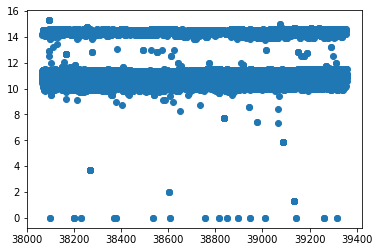

In [15]:
plt.scatter(GOLL4['seconds'][35000:60846], GOLL4['Preço_Of_Compra'][35000:60846])

In [5]:
# Transforma para segundos o horario de prioridade
def time_to_second(data):
    data['parts'] = data['Hora_Prioridade'].apply(lambda x: x.split(':'))
    data['seconds'] = data['parts'].apply(lambda x: round(int(x[0])*(60*60) + int(x[1])*60 + float(x[2])))
    data_morning = data[ data['seconds'] < 35125 ]
    data_night = data[ data['seconds'] > 60846 ]
    data.drop(data_night.index, axis=0, inplace = True, errors='ignore')
    data.drop(data_morning.index, axis=0, inplace = True, errors='ignore')

# calcula a media de preco da acao num intervalo de 5minutos    
def media_temp(data, gran = 300):
    init = data['seconds'].iloc[0]
    end = data['seconds'].iloc[-1]
    lista = []
    media = []
    for i in range(len(data)):
        if data['seconds'].iloc[i] - init <= gran:
            lista.append(data['Preço_Of_Compra'].iloc[i])
        else:
            media.append(np.sum(lista) / len(lista))
            lista = []
            init = data['seconds'].iloc[i]
    
    headers = ['mean']
    
    df = pd.DataFrame(data = media, columns = headers)
    df['return'] = df['mean'].pct_change()
        
    return df

In [6]:
# SUZB3
time_to_second(SUZB3)
SUZB3      = media_temp(SUZB3)
mean_SUZB3 = np.mean(SUZB3['return'])
std_SUZB3  = np.std(SUZB3['return'])

# MGLU3
time_to_second(MGLU3)
MGLU3      = media_temp(MGLU3)
mean_MGLU3 = np.mean(MGLU3['return'])
std_MGLU3  = np.std(MGLU3['return'])

# FIBR3
time_to_second(FIBR3)
FIBR3      = media_temp(FIBR3)
mean_FIBR3 = np.mean(FIBR3['return'])
std_FIBR3  = np.std(FIBR3['return'])

# BTOW3
time_to_second(BTOW3)
BTOW3      = media_temp(BTOW3)
mean_BTOW3 = np.mean(BTOW3['return'])
std_BTOW3  = np.std(BTOW3['return'])

# VALE3
time_to_second(VALE3)
VALE3      = media_temp(VALE3)
mean_VALE3 = np.mean(VALE3['return'])
std_VALE3  = np.std(VALE3['return'])

# BRKM5
time_to_second(BRKM5)
BRKM5      = media_temp(BRKM5)
mean_BRKM5 = np.mean(BRKM5['return'])
std_BRKM5  = np.std(BRKM5['return'])

# EMBR3
time_to_second(EMBR3)
EMBR3      = media_temp(EMBR3)
mean_EMBR3 = np.mean(EMBR3['return'])
std_EMBR3  = np.std(EMBR3['return'])

# PETR4
time_to_second(PETR4)
PETR4      = media_temp(PETR4)
mean_PETR4 = np.mean(PETR4['return'])
std_PETR4  = np.std(PETR4['return'])

# CPFE3
time_to_second(CPFE3)
CPFE3      = media_temp(CPFE3)
mean_CPFE3 = np.mean(CPFE3['return'])
std_CPFE3  = np.std(CPFE3['return'])

# KLBN4
time_to_second(KLBN4)
KLBN4      = media_temp(KLBN4)
mean_KLBN4 = np.mean(KLBN4['return'])
std_KLBN4  = np.std(KLBN4['return'])

# BRFS3
time_to_second(BRFS3)
BRFS3      = media_temp(BRFS3)
mean_BRFS3 = np.mean(BRFS3['return'])
std_BRFS3  = np.std(BRFS3['return'])

# KROT3
time_to_second(KROT3)
KROT3      = media_temp(KROT3)
mean_KROT3 = np.mean(KROT3['return'])
std_KROT3  = np.std(KROT3['return'])

# ELET6
time_to_second(ELET6)
ELET6      = media_temp(ELET6)
mean_ELET6 = np.mean(ELET6['return'])
std_ELET6  = np.std(ELET6['return'])

# QUAL3
time_to_second(QUAL3)
QUAL3      = media_temp(QUAL3)
mean_QUAL3 = np.mean(QUAL3['return'])
std_QUAL3  = np.std(QUAL3['return'])

# UGPA3
time_to_second(UGPA3)
UGPA3      = media_temp(UGPA3)
mean_UGPA3 = np.mean(UGPA3['return'])
std_UGPA3  = np.std(UGPA3['return'])

# ECOR3
time_to_second(ECOR3)
ECOR3      = media_temp(ECOR3)
mean_ECOR3 = np.mean(ECOR3['return'])
std_ECOR3  = np.std(ECOR3['return'])

# ELET3
time_to_second(ELET3)
ELET3      = media_temp(ELET3)
mean_ELET3 = np.mean(ELET3['return'])
std_ELET3  = np.std(ELET3['return'])

# CCRO3
time_to_second(CCRO3)
CCRO3      = media_temp(CCRO3)
mean_CCRO3 = np.mean(CCRO3['return'])
std_CCRO3  = np.std(CCRO3['return'])

# SBSP3
time_to_second(SBSP3)
SBSP3      = media_temp(SBSP3)
mean_SBSP3 = np.mean(SBSP3['return'])
std_SBSP3  = np.std(SBSP3['return'])

# GOLL4
time_to_second(GOLL4)
GOLL4      = media_temp(GOLL4)
mean_GOLL4 = np.mean(GOLL4['return'])
std_GOLL4  = np.std(GOLL4['return'])

In [8]:
std_PETR4

0.057904118828776704

## Stationarity and correlations test/plots

In [7]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots \n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

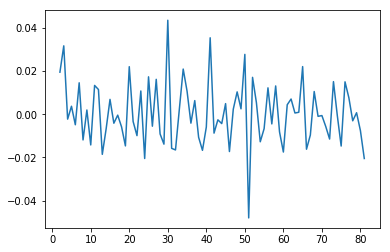

In [8]:
plt.plot(MGLU3['return'][2:])

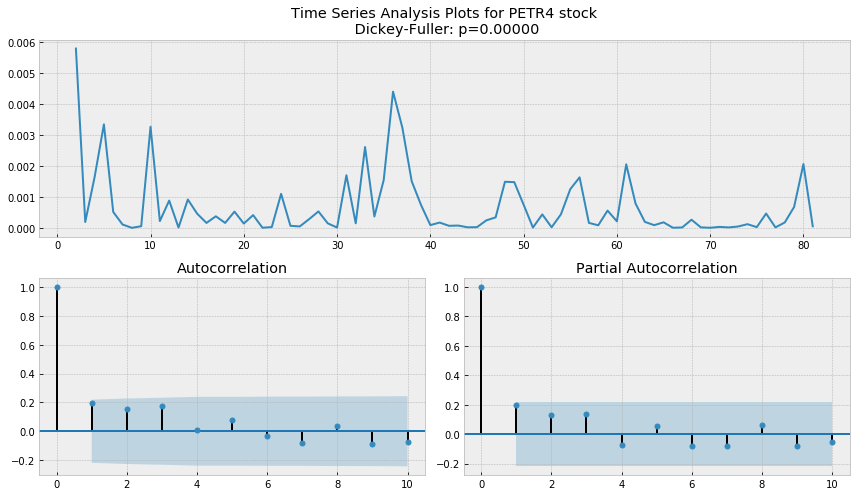

In [15]:
squared_data = PETR4['return'][2:].apply(lambda x: x**2)
tsplot(squared_data,lags=10)

## GARCH Model http://barnesanalytics.com/garch-models-in-python SEM split

Iteration:      1,   Func. Count:      7,   Neg. LLF: -182.12303968267162
Iteration:      2,   Func. Count:     23,   Neg. LLF: -182.17597041642065
Iteration:      3,   Func. Count:     34,   Neg. LLF: -182.1773503932376
Iteration:      4,   Func. Count:     43,   Neg. LLF: -182.39718284357943
Iteration:      5,   Func. Count:     51,   Neg. LLF: -182.5525458471741
Iteration:      6,   Func. Count:     59,   Neg. LLF: -182.56355857374064
Iteration:      7,   Func. Count:     66,   Neg. LLF: -182.5700399595553
Iteration:      8,   Func. Count:     73,   Neg. LLF: -182.57313288402992
Iteration:      9,   Func. Count:     80,   Neg. LLF: -182.5764691725891
Iteration:     10,   Func. Count:     87,   Neg. LLF: -182.58435147329584
Iteration:     11,   Func. Count:     94,   Neg. LLF: -182.5960086161023
Iteration:     12,   Func. Count:    101,   Neg. LLF: -182.61378734859022
Iteration:     13,   Func. Count:    108,   Neg. LLF: -182.6361601991111
Iteration:     14,   Func. Count:    115,   

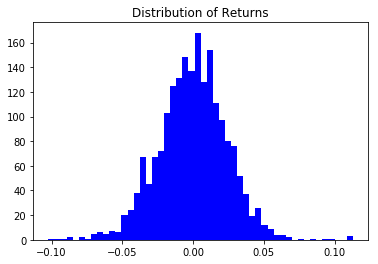

In [12]:
train   = PETR4['return'][2:]

model   = arch_model(train, vol = 'GARCH', p = 1, o = 0, q = 1, dist = 't')
results = model.fit()

forecasts = results.forecast(horizon=7, method='simulation', simulations=2000)
sims = forecasts.simulations

print('VaR: ', np.percentile(sims.values[-1,:,-1].T,1))
plt.hist(sims.values[-1, :,-1],bins=50, color = 'blue', alpha = 1)
plt.title('Distribution of Returns')
plt.show()

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       return   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                            GARCH   Log-Likelihood:                182.681
Distribution:      Standardized Student's t   AIC:                          -355.362
Method:                  Maximum Likelihood   BIC:                          -343.452
                                              No. Observations:                   80
Date:                      Sun, Dec 16 2018   Df Residuals:                       75
Time:                              10:31:59   Df Model:                            5
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.5541e-04  2.119e-03 -7.335e-02      0.942 [-4.308e-03,3.997e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.1806e-04  1.062e-04      1.111      0.266 [-9.017e-05,3.263e-04]
alpha[1]       0.2302      0.191      1.208      0.227      [ -0.143,  0.604]
beta[1]        0.5780      0.294      1.966  4.934e-02    [1.677e-03,  1.154]
                                 Distribution                                
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
nu            61.9280    455.402      0.136      0.892 [-8.306e+02,9.545e+02]
=============================================================================

Covariance estimator: robust
"""

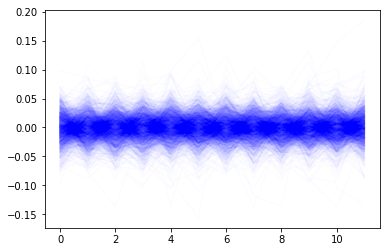

In [26]:
lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha = 0.010)
lines[0].set_label('Simulated paths')
plt.show()

## GARCH https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/ COM split

In [192]:
n_test = 5
train, test = GOLL4['return'][2:-n_test], GOLL4['return'][-n_test:]

# define model
arch_model(train, vol = 'GARCH', p = 1, o = 0, q = 1, dist = 't')
#model = arch_model(train, mean = 'Zero', vol='ARCH', p = 1, dist = 't')

results = model.fit()
print(results.summary())
# fit model
model_fit = model.fit()

print(model_fit.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: -70.3789285837879
Iteration:      2,   Func. Count:     23,   Neg. LLF: -70.47236595715127
Iteration:      3,   Func. Count:     33,   Neg. LLF: -70.49434773935748
Iteration:      4,   Func. Count:     47,   Neg. LLF: -70.51662787376412
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -70.51662787700997
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 4
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                       return   R-squared:                      -0.002
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                            GARCH   Log-Likelihood:                70.5166
Distribution:      Standardized Student's t   AIC:                          -131.033
Method:                  Maximum Likelihood   BIC:                

C:\Users\vipac\Anaconda3\lib\site-packages\arch\univariate\base.py:522: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\vipac\Anaconda3\lib\site-packages\arch\univariate\base.py:522: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


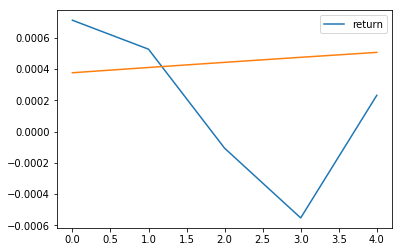

In [193]:
# forecast the test set
yhat = model_fit.forecast(horizon = n_test)

x = np.arange(0,n_test)
# plot the actual variance
var = GOLL4['return']*std_GOLL4
plt.plot(x, var[-n_test:])

# plot forecast variance
plt.plot(x, yhat.variance.values[-1, :])
plt.legend(loc = 'best')
plt.show()


In [99]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fi
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

TypeError: 'NoneType' object is not subscriptable

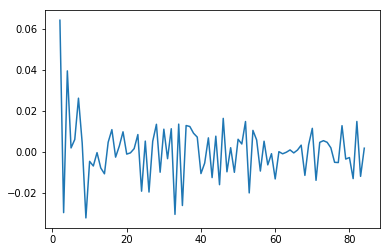

In [66]:
plt.plot(EMBR3['return'][2:])

In [47]:
from arch import arch_model

In [50]:
am = arch_model(GOLL4['return'][1:])

In [51]:
res = am.fit()
res.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -89.37074261622764
Iteration:      2,   Func. Count:     17,   Neg. LLF: -89.38472838941522
Iteration:      3,   Func. Count:     24,   Neg. LLF: -96.26937660746356
Iteration:      4,   Func. Count:     30,   Neg. LLF: -120.76220176199516
Iteration:      5,   Func. Count:     37,   Neg. LLF: -125.98815058557226
Iteration:      6,   Func. Count:     45,   Neg. LLF: -126.0578632920418
Iteration:      7,   Func. Count:     53,   Neg. LLF: -126.69607097850079
Iteration:      8,   Func. Count:     60,   Neg. LLF: -127.53458849429437
Iteration:      9,   Func. Count:     67,   Neg. LLF: -128.59318714750793
Iteration:     10,   Func. Count:     74,   Neg. LLF: -129.31218484268206
Iteration:     11,   Func. Count:     80,   Neg. LLF: -129.62217834175263
Iteration:     12,   Func. Count:     86,   Neg. LLF: -129.86509336471633
Iteration:     13,   Func. Count:     92,   Neg. LLF: -129.90722126090407
Iteration:     14,   Func. Count:     98, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                129.928
Distribution:                  Normal   AIC:                          -251.856
Method:            Maximum Likelihood   BIC:                          -241.279
                                        No. Observations:                  104
Date:                Sat, Dec 08 2018   Df Residuals:                      100
Time:                        18:52:21   Df Model:                            4
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.7223e-03  2.787e-03      0.977      0.329 [-2.740e-03,8.185e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.6060e-04  1.000e-04      1.606      0.108 [-3.545e-05,3.567e-04]
alpha[1]       0.4554      0.154      2.962  3.058e-03      [  0.154,  0.757]
beta[1]        0.5446  5.836e-02      9.332  1.041e-20      [  0.430,  0.659]
=============================================================================

Covariance estimator: robust
"""

In [14]:
best = [
SUZB3,
MGLU3,
FIBR3,
BTOW3,
VALE3,
BRKM5,
EMBR3,
PETR4,
CPFE3,
KLBN4]

worst = [
BRFS3,
KROT3,
ELET6,
QUAL3,
UGPA3,
ECOR3,
ELET3,
CCRO3,
SBSP3,
GOLL4]

C:\Users\vipac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  This is separate from the ipykernel package so we can avoid doing imports until


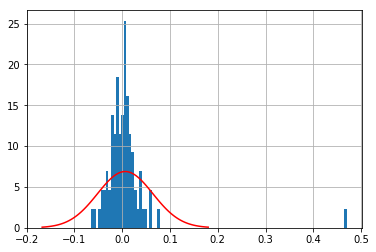

In [18]:
PETR4['return'].hist(bins = 100, histtype = 'stepfilled', alpha = 1,density = True)
x = np.linspace(mean_PETR4 - 3*std_PETR4, mean_PETR4 + 3*std_PETR4,100)
plt.plot(x,mlab.normpdf(x, mean_PETR4,std_PETR4),"r")
plt.show()

C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

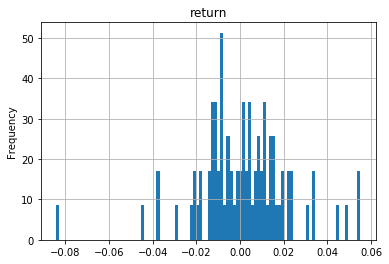

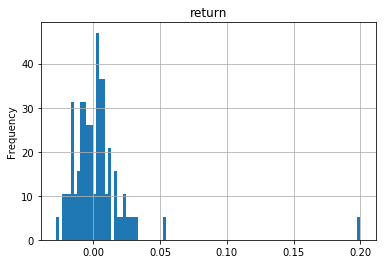

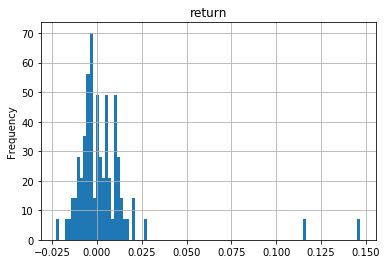

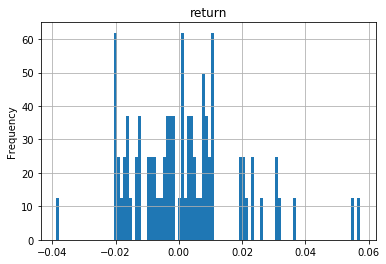

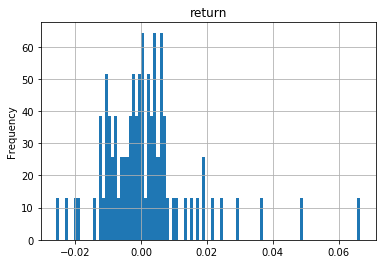

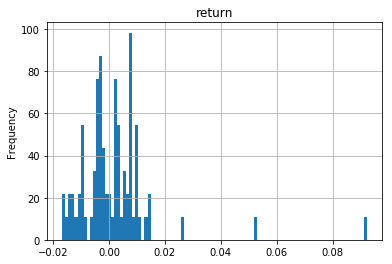

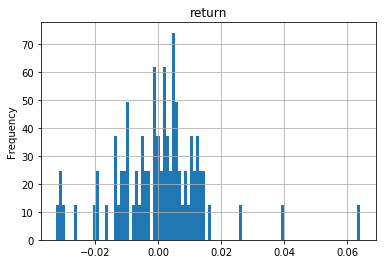

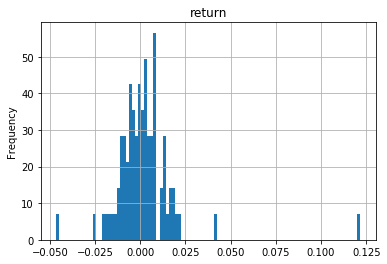

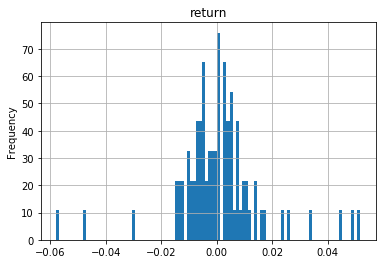

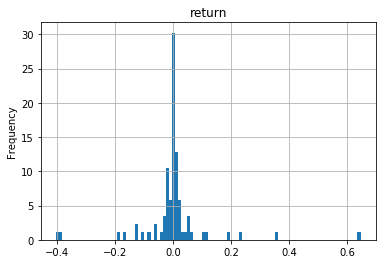

In [70]:
for i in best:
    i.hist(column = 'return', bins = 100, normed = True, histtype = 'stepfilled', alpha = 1, label = 'i')
    plt.ylabel('Frequency')

C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vipac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

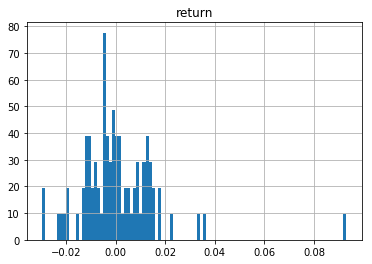

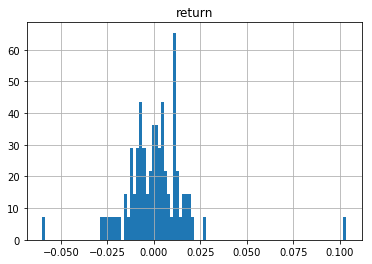

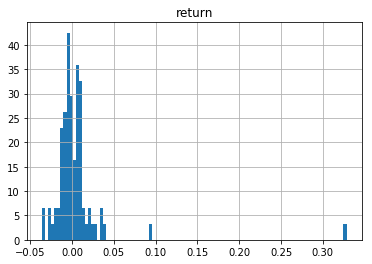

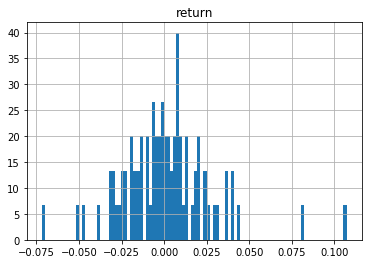

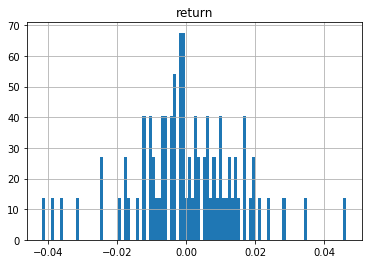

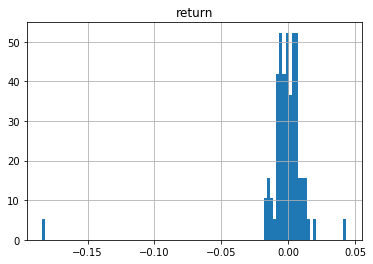

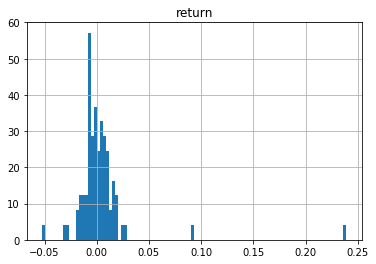

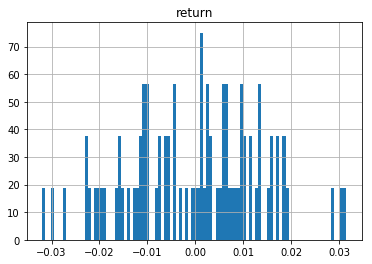

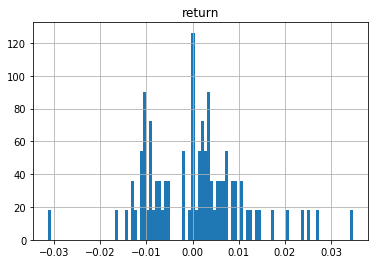

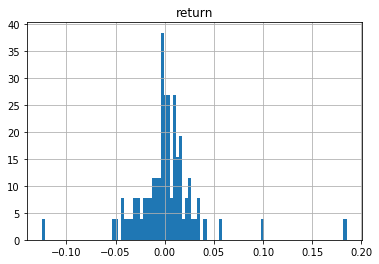

In [71]:
for i in worst:
    i.hist(column = 'return', bins = 100, normed = True, histtype = 'stepfilled', alpha = 1, label = i)

In [179]:
VaR_90 = [
norm.ppf(1-0.9, mean_SUZB3, std_SUZB3),
norm.ppf(1-0.9, mean_MGLU3, std_MGLU3),
norm.ppf(1-0.9, mean_FIBR3, std_FIBR3),
norm.ppf(1-0.9, mean_BTOW3, std_BTOW3),
norm.ppf(1-0.9, mean_VALE3, std_VALE3),
norm.ppf(1-0.9, mean_BRKM5, std_BRKM5),
norm.ppf(1-0.9, mean_EMBR3, std_EMBR3),
norm.ppf(1-0.9, mean_PETR4, std_PETR4),
norm.ppf(1-0.9, mean_CPFE3, std_CPFE3),
norm.ppf(1-0.9, mean_KLBN4, std_KLBN4),
norm.ppf(1-0.9, mean_BRFS3, std_BRFS3),
norm.ppf(1-0.9, mean_KROT3, std_KROT3),
norm.ppf(1-0.9, mean_ELET6, std_ELET6),
norm.ppf(1-0.9, mean_QUAL3, std_QUAL3),
norm.ppf(1-0.9, mean_UGPA3, std_UGPA3),
norm.ppf(1-0.9, mean_ECOR3, std_ECOR3),
norm.ppf(1-0.9, mean_ELET3, std_ELET3),
norm.ppf(1-0.9, mean_CCRO3, std_CCRO3),
norm.ppf(1-0.9, mean_SBSP3, std_SBSP3),
norm.ppf(1-0.9, mean_GOLL4, std_GOLL4)]

VaR_95 = [
norm.ppf(1-0.95, mean_SUZB3, std_SUZB3),
norm.ppf(1-0.95, mean_MGLU3, std_MGLU3),
norm.ppf(1-0.95, mean_FIBR3, std_FIBR3),
norm.ppf(1-0.95, mean_BTOW3, std_BTOW3),
norm.ppf(1-0.95, mean_VALE3, std_VALE3),
norm.ppf(1-0.95, mean_BRKM5, std_BRKM5),
norm.ppf(1-0.95, mean_EMBR3, std_EMBR3),
norm.ppf(1-0.95, mean_PETR4, std_PETR4),
norm.ppf(1-0.95, mean_CPFE3, std_CPFE3),
norm.ppf(1-0.95, mean_KLBN4, std_KLBN4),
norm.ppf(1-0.95, mean_BRFS3, std_BRFS3),
norm.ppf(1-0.95, mean_KROT3, std_KROT3),
norm.ppf(1-0.95, mean_ELET6, std_ELET6),
norm.ppf(1-0.95, mean_QUAL3, std_QUAL3),
norm.ppf(1-0.95, mean_UGPA3, std_UGPA3),
norm.ppf(1-0.95, mean_ECOR3, std_ECOR3),
norm.ppf(1-0.95, mean_ELET3, std_ELET3),
norm.ppf(1-0.95, mean_CCRO3, std_CCRO3),
norm.ppf(1-0.95, mean_SBSP3, std_SBSP3),
norm.ppf(1-0.95, mean_GOLL4, std_GOLL4)
]

print(tabulate([['90%', VaR_90[0], VaR_90[1], VaR_90[2], VaR_90[3], VaR_90[4], VaR_90[5], VaR_90[6], VaR_90[7], VaR_90[8], VaR_90[9]],
                ['95%', VaR_95[0], VaR_95[1], VaR_95[2], VaR_95[3], VaR_95[4], VaR_95[5], VaR_95[6], VaR_95[7], VaR_95[8], VaR_95[9]]], 
               headers = ['CL_best', 'SUZB3', 'MGLU3','FIBR3', 'BTOW3', 'VALE3', 'BRKM5', 'EMBR3','PETR4', 'CPFE3', 'KLBN4']))



print(tabulate([['90%', VaR_90[10], VaR_90[11], VaR_90[12], VaR_90[13], VaR_90[14], VaR_90[15], VaR_90[16], VaR_90[17], VaR_90[18], VaR_90[19]],
                ['95%', VaR_95[10], VaR_95[11], VaR_95[12], VaR_95[13], VaR_95[14], VaR_95[15], VaR_95[16], VaR_95[17], VaR_95[18], VaR_95[19]]], 
               headers = ['CL_worst', 'BRFS3', 'KROT3','ELET6', 'QUAL3', 'UGPA3', 'ECOR3', 'ELET3','CCRO3', 'SBSP3', 'GOLL4']))

CL_best         SUZB3       MGLU3       FIBR3       BTOW3       VALE3       BRKM5       EMBR3       PETR4       CPFE3      KLBN4
---------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ---------
90%        -0.025451   -0.0296591  -0.0246713  -0.0195962  -0.0162956  -0.0162242  -0.0182175  -0.0206301  -0.0189818  -0.147511
95%        -0.0330798  -0.0389942  -0.0327062  -0.0256424  -0.0213332  -0.0213215  -0.0233917  -0.0270247  -0.0246177  -0.189973
CL_worst         BRFS3       KROT3       ELET6       QUAL3       UGPA3       ECOR3       ELET3       CCRO3       SBSP3       GOLL4
----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
90%         -0.0196459  -0.0218615  -0.0458612  -0.0321157  -0.0190539  -0.0298744  -0.0354947  -0.0179507  -0.0128217  -0.0411629
95%         -0.025396   -0.0282109  -0.0601788  -0.0414348  -0.024511   -0.0377961  -0.0465

In [ ]:
for i in best:
    i.sort_values('return', inplace = True, ascending = True)

In [180]:
kurto_index = []
for i in best:
    kurto_index.append(kurtosis(i['return'][1:]))
for i in worst:
    kurto_index.append(kurtosis(i['return'][1:]))

skew_index = []
for i in best:
    skew_index.append(skew(i['return'][1:]))
for i in worst:
    skew_index.append(skew(i['return'][1:]))
    

    
print(tabulate([['Kurtosis index', kurto_index[0], kurto_index[1], kurto_index[2], kurto_index[3], kurto_index[4], kurto_index[5], kurto_index[6], kurto_index[7], kurto_index[8], kurto_index[9]],
                ['skew index', skew_index[0], skew_index[1], skew_index[2], skew_index[3], skew_index[4], skew_index[5], skew_index[6], skew_index[7], skew_index[8], skew_index[9]]], 
               headers = ['Index best', 'SUZB3', 'MGLU3','FIBR3', 'BTOW3', 'VALE3', 'BRKM5', 'EMBR3','PETR4', 'CPFE3', 'KLBN4']))


print(tabulate([['Kurtosis index ', kurto_index[10], kurto_index[11], kurto_index[12], kurto_index[13], kurto_index[14], kurto_index[15], kurto_index[16], kurto_index[17], kurto_index[18], kurto_index[19]],
                ['skew index', skew_index[10], skew_index[11], skew_index[12], skew_index[13], skew_index[14], skew_index[15], skew_index[16], skew_index[17], skew_index[18], skew_index[19]]], 
               headers = ['Index worst', 'BRFS3', 'KROT3','ELET6', 'QUAL3', 'UGPA3', 'ECOR3', 'ELET3','CCRO3', 'SBSP3', 'GOLL4']))

Index best          SUZB3     MGLU3     FIBR3     BTOW3    VALE3     BRKM5     EMBR3    PETR4     CPFE3     KLBN4
--------------  ---------  --------  --------  --------  -------  --------  --------  -------  --------  --------
Kurtosis index   2.81172   38.2681   26.0196   1.35357   5.85492  19.8926   4.23764   23.8608  4.52229   13.0453
skew index      -0.397387   5.37653   4.74529  0.802756  1.79871   3.63636  0.788641   3.5604  0.117126   1.47461
Index worst        BRFS3     KROT3     ELET6     QUAL3      UGPA3     ECOR3     ELET3       CCRO3     SBSP3     GOLL4
--------------  --------  --------  --------  --------  ---------  --------  --------  ----------  --------  --------
Kurtosis index  12.0696   13.7404   51.597    3.4499     1.05839   55.208    41.6099   -0.403152   1.14117   11.6078
skew index       2.35622   1.82631   6.70744  0.826893  -0.143144  -6.80406   5.77611  -0.0633411  0.404039   1.51903


In [181]:
myList = list(np.around(np.array(skew_index),2))
myList

[-0.4,
 5.38,
 4.75,
 0.8,
 1.8,
 3.64,
 0.79,
 3.56,
 0.12,
 1.47,
 2.36,
 1.83,
 6.71,
 0.83,
 -0.14,
 -6.8,
 5.78,
 -0.06,
 0.4,
 1.52]

In [182]:
JB_index = []
for i in best:
    JB_index.append(jarque_bera(i['return'][1:]))
for i in worst:
    JB_index.append(jarque_bera(i['return'][1:]))

jar = list(np.around(np.array(JB_index),2))
jar

[array([29.88,  0.  ]),
 array([5530.28,    0.  ]),
 array([2684.82,    0.  ]),
 array([15.43,  0.  ]),
 array([165.28,   0.  ]),
 array([1570.13,    0.  ]),
 array([71.56,  0.  ]),
 array([2170.16,    0.  ]),
 array([71.77,  0.  ]),
 array([611.17,   0.  ]),
 array([587.59,   0.  ]),
 array([707.49,   0.  ]),
 array([9947.72,    0.  ]),
 array([51.23,  0.  ]),
 array([4.21, 0.12]),
 array([11315.86,     0.  ]),
 array([6526.93,    0.  ]),
 array([0.63, 0.73]),
 array([6.84, 0.03]),
 array([503.9,   0. ])]

In [12]:
t.fit(GOLL4['return'][1:]) # test de t-distribution

(9.338012173533421, -0.000190328080083539, 0.029333803331369954)

In [23]:
t.ppf(1-0.05, GOLL4['return'][1:])

array([            nan, 2.89400605e+012, 1.93173386e+009,             nan,
       3.31919749e+016,             nan, 5.87202943e+016,             nan,
       1.15489927e+058, 1.56520734e+030,             nan, 1.07520516e+068,
                   nan,             nan,             nan, 1.00252324e+028,
                   nan, 1.98626487e+060,             nan, 5.46346391e+036,
       5.59338783e+094,             nan, 5.10160444e+024,             nan,
                   nan,             nan, 2.94467035e+038, 4.84320047e+027,
                   nan, 1.00000000e+100,             nan, 1.00000000e+100,
                   nan, 1.82564051e+027,             nan,             nan,
       3.36146161e+033,             nan, 4.73054789e+054, 1.38248847e+052,
       9.00984019e+032,             nan,             nan, 1.43419464e+068,
       1.29468334e+015,             nan, 2.60877103e+099,             nan,
                   nan, 8.37851820e+022,             nan, 8.53588927e+089,
       1.71213274e+052, 4

In [20]:
t_index = []
for i in best:
    t_index.append(t.fit(i['return'][1:]))

temp = list(np.around(np.array(t_index),2))


In [21]:
temp

[array([2.628e+01, 0.000e+00, 1.000e-02]),
 array([9.26, 0.  , 0.01]),
 array([ 3.57, -0.  ,  0.01]),
 array([3.50415059e+06, 0.00000000e+00, 2.00000000e-02]),
 array([ 1.174e+01, -0.000e+00,  1.000e-02]),
 array([9.98, 0.  , 0.01]),
 array([5.58, 0.  , 0.01]),
 array([2.48, 0.  , 0.02]),
 array([ 4.097e+01, -0.000e+00,  1.000e-02]),
 array([0.93, 0.  , 0.01])]

In [ ]:
t_index = []
for i in best:
    t_index.append(t.fit(i['return'][1:]))
for i in worst:
    JB_index.append(jarque_bera(i['return'][1:]))

jar = list(np.around(np.array(JB_index),2))
jar

In [74]:
kurto_index = []
for i in best:
    kurto_index.append(kurtosis(i['return'][1:]))
for i in worst:
    kurto_index.append(kurtosis(i['return'][1:]))

skew_index = []
for i in best:
    skew_index.append(skew(i['return'][1:]))
for i in worst:
    skew_index.append(skew(i['return'][1:]))

print(tabulate([['Kurtosis index', kurto_index[0], kurto_index[1], kurto_index[2], kurto_index[3], kurto_index[4], kurto_index[5], kurto_index[6], kurto_index[7], kurto_index[8], kurto_index[9]],
                ['skew index', skew_index[0], skew_index[1], skew_index[2], skew_index[3], skew_index[4], skew_index[5], skew_index[6], skew_index[7], skew_index[8], skew_index[9]]], 
               headers = ['Index best', 'SUZB3', 'MGLU3','FIBR3', 'BTOW3', 'VALE3', 'BRKM5', 'EMBR3','PETR4', 'CPFE3', 'KLBN4']))


print(tabulate([['Kurtosis index ', kurto_index[10], kurto_index[11], kurto_index[12], kurto_index[13], kurto_index[14], kurto_index[15], kurto_index[16], kurto_index[17], kurto_index[18], kurto_index[19]],
                ['skew index', skew_index[10], skew_index[11], skew_index[12], skew_index[13], skew_index[14], skew_index[15], skew_index[16], skew_index[17], skew_index[18], skew_index[19]]], 
               headers = ['Index worst', 'BRFS3', 'KROT3','ELET6', 'QUAL3', 'UGPA3', 'ECOR3', 'ELET3','CCRO3', 'SBSP3', 'GOLL4']))

Index best          SUZB3     MGLU3     FIBR3     BTOW3    VALE3     BRKM5     EMBR3    PETR4     CPFE3     KLBN4
--------------  ---------  --------  --------  --------  -------  --------  --------  -------  --------  --------
Kurtosis index   2.81172   38.2681   26.0196   1.35357   5.85492  19.8926   4.23764   23.8608  4.52229   13.0453
skew index      -0.397387   5.37653   4.74529  0.802756  1.79871   3.63636  0.788641   3.5604  0.117126   1.47461
Index worst        BRFS3     KROT3     ELET6     QUAL3      UGPA3     ECOR3     ELET3       CCRO3     SBSP3     GOLL4
--------------  --------  --------  --------  --------  ---------  --------  --------  ----------  --------  --------
Kurtosis index  12.0696   13.7404   51.597    3.4499     1.05839   55.208    41.6099   -0.403152   1.14117   11.6078
skew index       2.35622   1.82631   6.70744  0.826893  -0.143144  -6.80406   5.77611  -0.0633411  0.404039   1.51903


In [34]:
skew_index

[2.97221914902826,
 7.83798617421526,
 9.095345767968416,
 7.5785125097132156,
 8.179338213573075,
 8.076985573035808,
 9.364864893708233,
 8.918333344223203,
 1.4044594133120059,
 7.970508885407335,
 3.1629302974105746,
 6.73487854348844,
 9.267381727123757,
 5.966040284738411,
 9.136968310893097,
 8.267633894644744,
 2.9348926192611997,
 8.718768878776029,
 5.482778209981417,
 6.324950524942188]

# Expected Shortfall

In [11]:
# SUZB3
SUZB3.sort_values('return', inplace = True, ascending = True)

# MGLU3
MGLU3.sort_values('return', inplace = True, ascending = True)

# FIBR3
FIBR3.sort_values('return', inplace = True, ascending = True)

# BTOW3
BTOW3.sort_values('return', inplace = True, ascending = True)

# VALE3
VALE3.sort_values('return', inplace = True, ascending = True)

# BRKM5
BRKM5.sort_values('return', inplace = True, ascending = True)

# EMBR3
EMBR3.sort_values('return', inplace = True, ascending = True)

# PETR4
PETR4.sort_values('return', inplace = True, ascending = True)

# CPFE3
CPFE3.sort_values('return', inplace = True, ascending = True)

# KLBN4
KLBN4.sort_values('return', inplace = True, ascending = True)

# BRFS3
BRFS3.sort_values('return', inplace = True, ascending = True)

# KROT3
KROT3.sort_values('return', inplace = True, ascending = True)

# ELET6
ELET6.sort_values('return', inplace = True, ascending = True)

# QUAL3
QUAL3.sort_values('return', inplace = True, ascending = True)

# UGPA3
UGPA3.sort_values('return', inplace = True, ascending = True)

# ECOR3
ECOR3.sort_values('return', inplace = True, ascending = True)

# ELET3
ELET3.sort_values('return', inplace = True, ascending = True)

# CCRO3
CCRO3.sort_values('return', inplace = True, ascending = True)

# SBSP3
SBSP3.sort_values('return', inplace = True, ascending = True)

# GOLL4
GOLL4.sort_values('return', inplace = True, ascending = True)

In [183]:
ES_90 = [
SUZB3['return'].quantile(0.1),
MGLU3['return'].quantile(0.1),
FIBR3['return'].quantile(0.1),
BTOW3['return'].quantile(0.1),
VALE3['return'].quantile(0.1),
BRKM5['return'].quantile(0.1),
EMBR3['return'].quantile(0.1),
PETR4['return'].quantile(0.1),
CPFE3['return'].quantile(0.1),
KLBN4['return'].quantile(0.1),
BRFS3['return'].quantile(0.1),
KROT3['return'].quantile(0.1),
ELET6['return'].quantile(0.1),
QUAL3['return'].quantile(0.1),
UGPA3['return'].quantile(0.1),
ECOR3['return'].quantile(0.1),
ELET3['return'].quantile(0.1),
CCRO3['return'].quantile(0.1),
SBSP3['return'].quantile(0.1),
GOLL4['return'].quantile(0.1)    
]

ES_95 = [
SUZB3['return'].quantile(0.05),
MGLU3['return'].quantile(0.05),
FIBR3['return'].quantile(0.05),
BTOW3['return'].quantile(0.05),
VALE3['return'].quantile(0.05),
BRKM5['return'].quantile(0.05),
EMBR3['return'].quantile(0.05),
PETR4['return'].quantile(0.05),
CPFE3['return'].quantile(0.05),
KLBN4['return'].quantile(0.05),
BRFS3['return'].quantile(0.05),
KROT3['return'].quantile(0.05),
ELET6['return'].quantile(0.05),
QUAL3['return'].quantile(0.05),
UGPA3['return'].quantile(0.05),
ECOR3['return'].quantile(0.05),
ELET3['return'].quantile(0.05),
CCRO3['return'].quantile(0.05),
SBSP3['return'].quantile(0.05),
GOLL4['return'].quantile(0.05)    
]

print(tabulate([['90%', ES_90[0], ES_90[1], ES_90[2], ES_90[3], ES_90[4], ES_90[5], ES_90[6], ES_90[7], ES_90[8], ES_90[9]],
                ['95%', ES_95[0], ES_95[1], ES_95[2], ES_95[3], ES_95[4], ES_95[5], ES_95[6], ES_95[7], ES_95[8], ES_95[9]]], 
               headers = ['CL_best', 'SUZB3', 'MGLU3','FIBR3', 'BTOW3', 'VALE3', 'BRKM5', 'EMBR3','PETR4', 'CPFE3', 'KLBN4']))



print(tabulate([['90%', ES_90[10], ES_90[11], ES_90[12], ES_90[13], ES_90[14], ES_90[15], ES_90[16], ES_90[17], ES_90[18], ES_90[19]],
                ['95%', ES_95[10], ES_95[11], ES_95[12], ES_95[13], ES_95[14], ES_95[15], ES_95[16], ES_95[17], ES_95[18], ES_95[19]]], 
               headers = ['CL_worst', 'BRFS3', 'KROT3','ELET6', 'QUAL3', 'UGPA3', 'ECOR3', 'ELET3','CCRO3', 'SBSP3', 'GOLL4']))

CL_best         SUZB3       MGLU3       FIBR3       BTOW3       VALE3       BRKM5       EMBR3       PETR4       CPFE3       KLBN4
---------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
90%        -0.0189509  -0.0157668  -0.0105545  -0.0182156  -0.0112601  -0.010812   -0.0154324  -0.0118869  -0.0118699  -0.0646079
95%        -0.0284242  -0.0193759  -0.0129546  -0.0202371  -0.0140446  -0.0137041  -0.025306   -0.0167458  -0.0143337  -0.125904
CL_worst         BRFS3       KROT3       ELET6       QUAL3       UGPA3        ECOR3       ELET3       CCRO3       SBSP3       GOLL4
----------  ----------  ----------  ----------  ----------  ----------  -----------  ----------  ----------  ----------  ----------
90%         -0.0132479  -0.0148982  -0.0142137  -0.0271985  -0.0171767  -0.00912687  -0.0118523  -0.0196439  -0.0109759  -0.0299198
95%         -0.0203116  -0.0231829  -0.0235012  -0.0318236  -0.0246479  -0.0136368   